# Reusing the datachallenge implementation for exploring global usecase with different constellation

## Creating novel input data configuration

### Visualizing the fields and their explanations

In [1]:
!oost-dc_ose_2021-input_data --cfg job -p params

# @package params
sat: ???
sat_list:
- alg
- h2ag
- j2g
- j2n
- j3
- s3a
min_time: '2016-12-01'
max_time: '2018-02-01'
min_lon: -66.0
max_lon: -54.0
min_lat: 32.0
max_lat: 44.0


In [2]:
!oost-dc_ose_2021-input_data --help

Overview:
    Download and prepare data for SSH Mapping (requires CMEMS credentials for download)
    The ssh is computed as "sla_filtered + mdt - lwe"

Basic CLI Usage:
  *  params.sat=<sat_id> to download a prepare a specific satellite

  *  --multirun: Execute the pipeline for each sat in sat_list

  *  params.(min|max)_(lon|lat|time)=<bound> to change the bound

  *  `-cd conf overrides=my_conf` to load config from conf/aprl/overrides/my_conf.yaml

Params:
    sat (str): altimeter id to download (place holder for multirun)
    sat_list (str): list of satellite to download
    min_time: start of the temporal domain
    max_time: end of the temporal domain
    min_lon: lower longitudinal bound
    max_lon: upper longitudinal bound
    min_lat: upper latitudinal bound
    max_lat: upper latitudinal bound

Parts:
	_01_dl_track -> copernicusmarine.python_interface.get.get
	_02_prepare_track -> oost_dc_ose_2021.mods.prepare_track.prepare_track

Misc:
    Run  with "dry=True hydra.verbose

### Writing new file

In [3]:
!mkdir -p conf/aprl/overrides

In [4]:
%%writefile conf/aprl/overrides/global.yaml
# @package params

sat_list: [j3, s3b, h2ag, c2]
min_time: 2019-05-01
max_time: 2019-05-31
min_lon: -180
max_lon: 180
min_lat: -90
max_lat: 90

Writing conf/aprl/overrides/global.yaml


In [5]:
%%bash
oost-dc_ose_2021-input_data -m \
    'hydra.searchpath=[file://conf]'  +overrides@params=global\
     dry=True

[2024-04-15 15:29:04,530][HYDRA] Launching 4 jobs locally


[2024-04-15 15:29:04,530][HYDRA] 	#0 : params.sat=j3 +overrides@params=global dry=True


[2024-04-15 15:29:04,626][aprl.appareil][INFO] - Starting


[2024-04-15 15:29:04,626][aprl.appareil][INFO] - Running part _01_dl_track


[2024-04-15 15:29:04,626][aprl.appareil][INFO] - Running part _02_prepare_track


[2024-04-15 15:29:04,626][aprl.appareil][INFO] - Done


[2024-04-15 15:29:04,627][HYDRA] 	#1 : params.sat=s3b +overrides@params=global dry=True


[2024-04-15 15:29:04,723][aprl.appareil][INFO] - Starting


[2024-04-15 15:29:04,723][aprl.appareil][INFO] - Running part _01_dl_track


[2024-04-15 15:29:04,723][aprl.appareil][INFO] - Running part _02_prepare_track


[2024-04-15 15:29:04,723][aprl.appareil][INFO] - Done


[2024-04-15 15:29:04,723][HYDRA] 	#2 : params.sat=h2ag +overrides@params=global dry=True


[2024-04-15 15:29:04,818][aprl.appareil][INFO] - Starting


[2024-04-15 15:29:04,818][aprl.appareil][INFO] - Running part _01_dl_track


[2024-04-15 15:29:04,818][aprl.appareil][INFO] - Running part _02_prepare_track


[2024-04-15 15:29:04,818][aprl.appareil][INFO] - Done


[2024-04-15 15:29:04,819][HYDRA] 	#3 : params.sat=c2 +overrides@params=global dry=True


[2024-04-15 15:29:04,913][aprl.appareil][INFO] - Starting


[2024-04-15 15:29:04,913][aprl.appareil][INFO] - Running part _01_dl_track


[2024-04-15 15:29:04,913][aprl.appareil][INFO] - Running part _02_prepare_track


[2024-04-15 15:29:04,913][aprl.appareil][INFO] - Done


In [6]:
%%bash
oost-dc_ose_2021-input_data -m \
    'hydra.searchpath=[file://conf]' \
      +overrides@params=global \
      hydra/launcher=joblib \
      hydra.launcher.n_jobs=4 

[2024-04-15 15:29:06,489][HYDRA] Joblib.Parallel(n_jobs=4,backend=loky,prefer=processes,require=None,verbose=0,timeout=None,pre_dispatch=2*n_jobs,batch_size=auto,temp_folder=None,max_nbytes=None,mmap_mode=r) is launching 4 jobs


[2024-04-15 15:29:06,489][HYDRA] Launching jobs, sweep output dir : multirun/2024-04-15/15-29-06


[2024-04-15 15:29:06,489][HYDRA] 	#0 : params.sat=j3 +overrides@params=global


[2024-04-15 15:29:06,489][HYDRA] 	#1 : params.sat=s3b +overrides@params=global


[2024-04-15 15:29:06,490][HYDRA] 	#2 : params.sat=h2ag +overrides@params=global


[2024-04-15 15:29:06,490][HYDRA] 	#3 : params.sat=c2 +overrides@params=global


[2024-04-15 15:29:07,489][aprl.appareil][INFO] - Starting


[2024-04-15 15:29:07,489][aprl.appareil][INFO] - Running part _01_dl_track


[2024-04-15 15:29:07,491][aprl.appareil][INFO] - Starting


[2024-04-15 15:29:07,491][aprl.appareil][INFO] - Running part _01_dl_track


[2024-04-15 15:29:07,502][aprl.appareil][INFO] - Starting


[2024-04-15 15:29:07,503][aprl.appareil][INFO] - Running part _01_dl_track


[2024-04-15 15:29:07,517][aprl.appareil][INFO] - Starting


[2024-04-15 15:29:07,517][aprl.appareil][INFO] - Running part _01_dl_track


INFO - 2024-04-15T15:29:07Z - Dataset version was not specified, the latest one was selected: "202112"


[2024-04-15 15:29:07,899][copernicus_marine_root_logger][INFO] - Dataset version was not specified, the latest one was selected: "202112"


INFO - 2024-04-15T15:29:07Z - Dataset part was not specified, the first one was selected: "default"


[2024-04-15 15:29:07,899][copernicus_marine_root_logger][INFO] - Dataset part was not specified, the first one was selected: "default"


INFO - 2024-04-15T15:29:07Z - Service was not specified, the default one was selected: "original-files"


[2024-04-15 15:29:07,899][copernicus_marine_root_logger][INFO] - Service was not specified, the default one was selected: "original-files"


INFO - 2024-04-15T15:29:07Z - Downloading using service original-files...


[2024-04-15 15:29:07,899][copernicus_marine_root_logger][INFO] - Downloading using service original-files...


INFO - 2024-04-15T15:29:08Z - Dataset version was not specified, the latest one was selected: "202112"


[2024-04-15 15:29:08,202][copernicus_marine_root_logger][INFO] - Dataset version was not specified, the latest one was selected: "202112"


INFO - 2024-04-15T15:29:08Z - Dataset part was not specified, the first one was selected: "default"


[2024-04-15 15:29:08,202][copernicus_marine_root_logger][INFO] - Dataset part was not specified, the first one was selected: "default"


INFO - 2024-04-15T15:29:08Z - Service was not specified, the default one was selected: "original-files"


[2024-04-15 15:29:08,202][copernicus_marine_root_logger][INFO] - Service was not specified, the default one was selected: "original-files"


INFO - 2024-04-15T15:29:08Z - Downloading using service original-files...


[2024-04-15 15:29:08,202][copernicus_marine_root_logger][INFO] - Downloading using service original-files...


INFO - 2024-04-15T15:29:08Z - Dataset version was not specified, the latest one was selected: "202112"


[2024-04-15 15:29:08,434][copernicus_marine_root_logger][INFO] - Dataset version was not specified, the latest one was selected: "202112"


INFO - 2024-04-15T15:29:08Z - Dataset part was not specified, the first one was selected: "default"


[2024-04-15 15:29:08,434][copernicus_marine_root_logger][INFO] - Dataset part was not specified, the first one was selected: "default"


INFO - 2024-04-15T15:29:08Z - Service was not specified, the default one was selected: "original-files"


[2024-04-15 15:29:08,434][copernicus_marine_root_logger][INFO] - Service was not specified, the default one was selected: "original-files"


INFO - 2024-04-15T15:29:08Z - Downloading using service original-files...


[2024-04-15 15:29:08,434][copernicus_marine_root_logger][INFO] - Downloading using service original-files...


INFO - 2024-04-15T15:29:08Z - Dataset version was not specified, the latest one was selected: "202112"


[2024-04-15 15:29:08,786][copernicus_marine_root_logger][INFO] - Dataset version was not specified, the latest one was selected: "202112"


INFO - 2024-04-15T15:29:08Z - Dataset part was not specified, the first one was selected: "default"


[2024-04-15 15:29:08,787][copernicus_marine_root_logger][INFO] - Dataset part was not specified, the first one was selected: "default"


INFO - 2024-04-15T15:29:08Z - Service was not specified, the default one was selected: "original-files"


[2024-04-15 15:29:08,787][copernicus_marine_root_logger][INFO] - Service was not specified, the default one was selected: "original-files"


INFO - 2024-04-15T15:29:08Z - Downloading using service original-files...


[2024-04-15 15:29:08,787][copernicus_marine_root_logger][INFO] - Downloading using service original-files...


100%|██████████| 31/31 [00:06<00:00,  4.56it/s]


[2024-04-15 15:29:15,601][aprl.appareil][INFO] - part _01_dl_track done


[2024-04-15 15:29:15,601][aprl.appareil][INFO] - Running part _02_prepare_track


[2024-04-15 15:29:15,601][oost_dc_ose_2021.mods.prepare_track][INFO] - Starting


100%|██████████| 31/31 [00:06<00:00,  4.56it/s]


[2024-04-15 15:29:16,402][aprl.appareil][INFO] - part _01_dl_track done


[2024-04-15 15:29:16,402][aprl.appareil][INFO] - Running part _02_prepare_track


[2024-04-15 15:29:16,402][oost_dc_ose_2021.mods.prepare_track][INFO] - Starting


100%|██████████| 31/31 [00:07<00:00,  4.30it/s]


[2024-04-15 15:29:16,637][aprl.appareil][INFO] - part _01_dl_track done


[2024-04-15 15:29:16,638][aprl.appareil][INFO] - Running part _02_prepare_track


[2024-04-15 15:29:16,638][oost_dc_ose_2021.mods.prepare_track][INFO] - Starting


100%|██████████| 31/31 [00:07<00:00,  4.01it/s]


[2024-04-15 15:29:17,500][aprl.appareil][INFO] - part _01_dl_track done


[2024-04-15 15:29:17,500][aprl.appareil][INFO] - Running part _02_prepare_track


[2024-04-15 15:29:17,500][oost_dc_ose_2021.mods.prepare_track][INFO] - Starting


[2024-04-15 15:29:19,350][oost_dc_ose_2021.mods.prepare_track][INFO] - Done


[2024-04-15 15:29:19,370][aprl.appareil][INFO] - part _02_prepare_track done


[2024-04-15 15:29:19,370][aprl.appareil][INFO] - Done


[2024-04-15 15:29:19,550][oost_dc_ose_2021.mods.prepare_track][INFO] - Done


[2024-04-15 15:29:19,563][aprl.appareil][INFO] - part _02_prepare_track done


[2024-04-15 15:29:19,563][aprl.appareil][INFO] - Done


[2024-04-15 15:29:20,281][oost_dc_ose_2021.mods.prepare_track][INFO] - Done


[2024-04-15 15:29:20,294][aprl.appareil][INFO] - part _02_prepare_track done


[2024-04-15 15:29:20,294][aprl.appareil][INFO] - Done


[2024-04-15 15:29:20,721][oost_dc_ose_2021.mods.prepare_track][INFO] - Done


[2024-04-15 15:29:20,738][aprl.appareil][INFO] - part _02_prepare_track done


[2024-04-15 15:29:20,738][aprl.appareil][INFO] - Done


In [7]:
import xarray as xr
import pandas as pd

obs = xr.open_mfdataset('data/prepared/input/*.nc', combine='nested',concat_dim='time')
obs

<xarray.Dataset> Size: 167MB
Dimensions:  (time: 5217445)
Coordinates:
  * time     (time) datetime64[ns] 42MB 2019-05-01T00:19:46.307290112 ... 201...
    lon      (time) float64 42MB dask.array<chunksize=(1394167,), meta=np.ndarray>
    lat      (time) float64 42MB dask.array<chunksize=(1394167,), meta=np.ndarray>
Data variables:
    ssh      (time) float64 42MB dask.array<chunksize=(1394167,), meta=np.ndarray>
Attributes: (12/44)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Swath
    comment:                         Sea surface height measured by altimeter...
    contact:                         servicedesk.cmems@mercator-ocean.eu
    creator_email:                   servicedesk.cmems@mercator-ocean.eu
    ...                              ...
    summary:                         SSALTO/DUACS Delayed-Time Level-3 sea su...
    time_coverage_duration:          P22H56M25.547915S
    time_coverage_end:               2019-05-01T23:16:11Z
    time_coverage_resolution:        P1S
    time_coverage_start:             2019-05-01T00:19:46Z
    title:                           DT Cryosat-2 Global Ocean Along track SS...

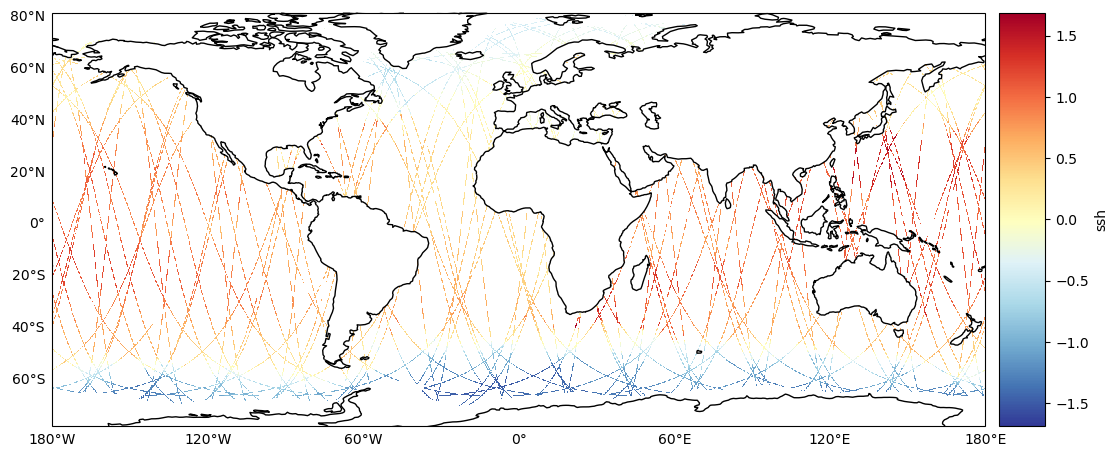

In [8]:
import hvplot.xarray
import hvplot
hvplot.extension('matplotlib')
%matplotlib inline

bin_size = 0.25
to_plot = (obs.where((obs.time>pd.to_datetime('2019-05-15')) & (obs.time<pd.to_datetime('2019-05-16')) )
.drop_vars('time').assign(
        lat=obs.lat / bin_size // 1 * bin_size,
        lon=obs.lon / bin_size // 1 * bin_size
    )[['ssh', 'lat', 'lon']].load()
    .drop_vars('time')
    .to_dataframe()
    .groupby(['lat', 'lon']).mean()
    .to_xarray()
).ssh
hvfig = to_plot.hvplot(
    kind='quadmesh',
    geo=True,
    coastline=True,
    width=1000,
    cmap='RdYlBu_r'
)
bokfig = hvplot.render(hvfig, backend='matplotlib')
bokfig

In [9]:
!wget https://gist.githubusercontent.com/quentinf00/2d034392ee9b385fb4de3c8628bfc844/raw/aaeaed8ce5a1559507be8dd52e37c134f777192c/patcher_oi_torch.py

--2024-04-15 15:29:33--  https://gist.githubusercontent.com/quentinf00/2d034392ee9b385fb4de3c8628bfc844/raw/aaeaed8ce5a1559507be8dd52e37c134f777192c/patcher_oi_torch.py
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.111.133|:443... 

connected.
HTTP request sent, awaiting response... 

200 OK
Length: 4242 (4,1K) [text/plain]
Saving to: ‘patcher_oi_torch.py’

patcher_oi_torch.py 100%[===================>]   4,14K  --.-KB/s    in 0s      

2024-04-15 15:29:33 (37,0 MB/s) - ‘patcher_oi_torch.py’ saved [4242/4242]



<script src="https://gist.github.com/quentinf00/2d034392ee9b385fb4de3c8628bfc844.js"></script>

In [10]:
import numpy as np
import xarray as xr
import pandas as pd
from functools import partial
from xrpatcher import XRDAPatcher
from patcher_oi_torch import oi


outgrid = oi(
    outgrid_da=xr.DataArray(
        dims=('time', 'lat', 'lon'),
        coords=dict(
            time=pd.date_range('2019-05-15', '2019-05-15'),
            lat=np.arange(-90, 90, .25),
            lon=np.arange(-180, 180, .25),
        ),
    ),
    patcher_cls=partial(XRDAPatcher,
        patches=dict(time=1, lat=80, lon=80),
        strides=dict(time=1, lat=80, lon=80)
    ),
    obs=obs.load(),
    lt=pd.to_timedelta('7D'), lx=1., ly=1.,
    noise=0.05,
    obs_dt=pd.to_timedelta('2D'), obs_dx=.5, obs_dy=.5,
    device='cuda'
)

  0%|                                                                                                                          | 0/162 [00:00<?, ?it/s]

  1%|▋                                                                                                                 | 1/162 [00:03<08:07,  3.03s/it]

  1%|█▍                                                                                                                | 2/162 [00:03<03:33,  1.34s/it]

  2%|██                                                                                                                | 3/162 [00:03<02:06,  1.26it/s]

  2%|██▊                                                                                                               | 4/162 [00:03<01:25,  1.85it/s]

  3%|███▌                                                                                                              | 5/162 [00:03<01:02,  2.50it/s]

  4%|████▏                                                                                                             | 6/162 [00:03<00:49,  3.18it/s]

  4%|████▉                                                                                                             | 7/162 [00:03<00:39,  3.89it/s]

  5%|█████▋                                                                                                            | 8/162 [00:04<00:34,  4.49it/s]

  6%|██████▎                                                                                                           | 9/162 [00:04<00:30,  5.00it/s]

  6%|██████▉                                                                                                          | 10/162 [00:04<00:27,  5.56it/s]

  7%|███████▋                                                                                                         | 11/162 [00:04<00:25,  5.98it/s]

  7%|████████▎                                                                                                        | 12/162 [00:04<00:23,  6.32it/s]

  8%|█████████                                                                                                        | 13/162 [00:04<00:22,  6.60it/s]

  9%|█████████▊                                                                                                       | 14/162 [00:04<00:21,  6.83it/s]

  9%|██████████▍                                                                                                      | 15/162 [00:05<00:21,  6.99it/s]

 10%|███████████▏                                                                                                     | 16/162 [00:05<00:20,  7.10it/s]

 10%|███████████▊                                                                                                     | 17/162 [00:05<00:20,  7.19it/s]

 11%|████████████▌                                                                                                    | 18/162 [00:05<00:19,  7.25it/s]

 12%|█████████████▎                                                                                                   | 19/162 [00:05<00:34,  4.19it/s]

 12%|█████████████▉                                                                                                   | 20/162 [00:06<00:48,  2.94it/s]

 13%|██████████████▋                                                                                                  | 21/162 [00:07<01:01,  2.28it/s]

 14%|███████████████▎                                                                                                 | 22/162 [00:07<01:10,  2.00it/s]

 14%|████████████████                                                                                                 | 23/162 [00:08<01:14,  1.86it/s]

 15%|████████████████▋                                                                                                | 24/162 [00:08<01:10,  1.94it/s]

 15%|█████████████████▍                                                                                               | 25/162 [00:09<01:02,  2.18it/s]

 16%|██████████████████▏                                                                                              | 26/162 [00:09<01:05,  2.06it/s]

 17%|██████████████████▊                                                                                              | 27/162 [00:10<01:11,  1.88it/s]

 17%|███████████████████▌                                                                                             | 28/162 [00:10<01:09,  1.91it/s]

 18%|████████████████████▏                                                                                            | 29/162 [00:11<01:08,  1.93it/s]

 19%|████████████████████▉                                                                                            | 30/162 [00:11<01:07,  1.95it/s]

 19%|█████████████████████▌                                                                                           | 31/162 [00:12<01:03,  2.07it/s]

 20%|██████████████████████▎                                                                                          | 32/162 [00:12<00:57,  2.24it/s]

 20%|███████████████████████                                                                                          | 33/162 [00:13<00:55,  2.32it/s]

 21%|███████████████████████▋                                                                                         | 34/162 [00:13<00:54,  2.33it/s]

 22%|████████████████████████▍                                                                                        | 35/162 [00:13<00:54,  2.31it/s]

 22%|█████████████████████████                                                                                        | 36/162 [00:14<00:56,  2.25it/s]

 23%|█████████████████████████▊                                                                                       | 37/162 [00:14<00:56,  2.21it/s]

 23%|██████████████████████████▌                                                                                      | 38/162 [00:15<00:58,  2.10it/s]

 24%|███████████████████████████▏                                                                                     | 39/162 [00:15<00:59,  2.05it/s]

 25%|███████████████████████████▉                                                                                     | 40/162 [00:16<01:00,  2.01it/s]

 25%|████████████████████████████▌                                                                                    | 41/162 [00:16<01:00,  1.99it/s]

 26%|█████████████████████████████▎                                                                                   | 42/162 [00:17<00:51,  2.32it/s]

 27%|█████████████████████████████▉                                                                                   | 43/162 [00:17<00:51,  2.33it/s]

 27%|██████████████████████████████▋                                                                                  | 44/162 [00:18<00:54,  2.18it/s]

 28%|███████████████████████████████▍                                                                                 | 45/162 [00:18<00:56,  2.06it/s]

 28%|████████████████████████████████                                                                                 | 46/162 [00:19<00:57,  2.03it/s]

 29%|████████████████████████████████▊                                                                                | 47/162 [00:19<00:55,  2.07it/s]

 30%|█████████████████████████████████▍                                                                               | 48/162 [00:20<00:56,  2.02it/s]

 30%|██████████████████████████████████▏                                                                              | 49/162 [00:20<00:56,  1.99it/s]

 31%|██████████████████████████████████▉                                                                              | 50/162 [00:21<00:56,  1.97it/s]

 31%|███████████████████████████████████▌                                                                             | 51/162 [00:21<00:55,  2.00it/s]

 32%|████████████████████████████████████▎                                                                            | 52/162 [00:22<00:50,  2.17it/s]

 33%|████████████████████████████████████▉                                                                            | 53/162 [00:22<00:47,  2.31it/s]

 33%|█████████████████████████████████████▋                                                                           | 54/162 [00:22<00:46,  2.30it/s]

 34%|██████████████████████████████████████▎                                                                          | 55/162 [00:23<00:45,  2.33it/s]

 35%|███████████████████████████████████████                                                                          | 56/162 [00:23<00:46,  2.26it/s]

 35%|███████████████████████████████████████▊                                                                         | 57/162 [00:24<00:47,  2.22it/s]

 36%|████████████████████████████████████████▍                                                                        | 58/162 [00:24<00:47,  2.20it/s]

 36%|█████████████████████████████████████████▏                                                                       | 59/162 [00:25<00:46,  2.21it/s]

 37%|█████████████████████████████████████████▊                                                                       | 60/162 [00:25<00:38,  2.63it/s]

 38%|██████████████████████████████████████████▌                                                                      | 61/162 [00:25<00:32,  3.14it/s]

 38%|███████████████████████████████████████████▏                                                                     | 62/162 [00:25<00:34,  2.88it/s]

 39%|███████████████████████████████████████████▉                                                                     | 63/162 [00:26<00:39,  2.51it/s]

 40%|████████████████████████████████████████████▋                                                                    | 64/162 [00:26<00:37,  2.64it/s]

 40%|█████████████████████████████████████████████▎                                                                   | 65/162 [00:27<00:31,  3.12it/s]

 41%|██████████████████████████████████████████████                                                                   | 66/162 [00:27<00:32,  2.95it/s]

 41%|██████████████████████████████████████████████▋                                                                  | 67/162 [00:27<00:35,  2.64it/s]

 42%|███████████████████████████████████████████████▍                                                                 | 68/162 [00:28<00:37,  2.48it/s]

 43%|████████████████████████████████████████████████▏                                                                | 69/162 [00:28<00:36,  2.55it/s]

 43%|████████████████████████████████████████████████▊                                                                | 70/162 [00:28<00:30,  3.01it/s]

 44%|█████████████████████████████████████████████████▌                                                               | 71/162 [00:29<00:28,  3.18it/s]

 44%|██████████████████████████████████████████████████▏                                                              | 72/162 [00:29<00:31,  2.90it/s]

 45%|██████████████████████████████████████████████████▉                                                              | 73/162 [00:30<00:32,  2.73it/s]

 46%|███████████████████████████████████████████████████▌                                                             | 74/162 [00:30<00:34,  2.52it/s]

 46%|████████████████████████████████████████████████████▎                                                            | 75/162 [00:30<00:36,  2.39it/s]

 47%|█████████████████████████████████████████████████████                                                            | 76/162 [00:31<00:36,  2.34it/s]

 48%|█████████████████████████████████████████████████████▋                                                           | 77/162 [00:31<00:36,  2.36it/s]

 48%|██████████████████████████████████████████████████████▍                                                          | 78/162 [00:31<00:29,  2.88it/s]

 49%|███████████████████████████████████████████████████████                                                          | 79/162 [00:32<00:25,  3.26it/s]

 49%|███████████████████████████████████████████████████████▊                                                         | 80/162 [00:32<00:27,  2.95it/s]

 50%|████████████████████████████████████████████████████████▌                                                        | 81/162 [00:32<00:28,  2.88it/s]

 51%|█████████████████████████████████████████████████████████▏                                                       | 82/162 [00:33<00:24,  3.25it/s]

 51%|█████████████████████████████████████████████████████████▉                                                       | 83/162 [00:33<00:20,  3.84it/s]

 52%|██████████████████████████████████████████████████████████▌                                                      | 84/162 [00:33<00:21,  3.64it/s]

 52%|███████████████████████████████████████████████████████████▎                                                     | 85/162 [00:34<00:24,  3.14it/s]

 53%|███████████████████████████████████████████████████████████▉                                                     | 86/162 [00:34<00:26,  2.88it/s]

 54%|████████████████████████████████████████████████████████████▋                                                    | 87/162 [00:34<00:25,  2.98it/s]

 54%|█████████████████████████████████████████████████████████████▍                                                   | 88/162 [00:35<00:24,  2.98it/s]

 55%|██████████████████████████████████████████████████████████████                                                   | 89/162 [00:35<00:25,  2.87it/s]

 56%|██████████████████████████████████████████████████████████████▊                                                  | 90/162 [00:35<00:26,  2.71it/s]

 56%|███████████████████████████████████████████████████████████████▍                                                 | 91/162 [00:36<00:27,  2.62it/s]

 57%|████████████████████████████████████████████████████████████████▏                                                | 92/162 [00:36<00:28,  2.45it/s]

 57%|████████████████████████████████████████████████████████████████▊                                                | 93/162 [00:37<00:29,  2.34it/s]

 58%|█████████████████████████████████████████████████████████████████▌                                               | 94/162 [00:37<00:26,  2.55it/s]

 59%|██████████████████████████████████████████████████████████████████▎                                              | 95/162 [00:37<00:24,  2.79it/s]

 59%|██████████████████████████████████████████████████████████████████▉                                              | 96/162 [00:38<00:23,  2.75it/s]

 60%|███████████████████████████████████████████████████████████████████▋                                             | 97/162 [00:38<00:24,  2.62it/s]

 60%|████████████████████████████████████████████████████████████████████▎                                            | 98/162 [00:39<00:26,  2.43it/s]

 61%|█████████████████████████████████████████████████████████████████████                                            | 99/162 [00:39<00:21,  2.89it/s]

 62%|█████████████████████████████████████████████████████████████████████▏                                          | 100/162 [00:39<00:17,  3.49it/s]

 62%|█████████████████████████████████████████████████████████████████████▊                                          | 101/162 [00:39<00:15,  4.01it/s]

 63%|██████████████████████████████████████████████████████████████████████▌                                         | 102/162 [00:39<00:14,  4.26it/s]

 64%|███████████████████████████████████████████████████████████████████████▏                                        | 103/162 [00:40<00:13,  4.28it/s]

 64%|███████████████████████████████████████████████████████████████████████▉                                        | 104/162 [00:40<00:13,  4.44it/s]

 65%|████████████████████████████████████████████████████████████████████████▌                                       | 105/162 [00:40<00:12,  4.53it/s]

 65%|█████████████████████████████████████████████████████████████████████████▎                                      | 106/162 [00:40<00:14,  3.74it/s]

 66%|█████████████████████████████████████████████████████████████████████████▉                                      | 107/162 [00:41<00:17,  3.06it/s]

 67%|██████████████████████████████████████████████████████████████████████████▋                                     | 108/162 [00:41<00:19,  2.82it/s]

 67%|███████████████████████████████████████████████████████████████████████████▎                                    | 109/162 [00:42<00:20,  2.57it/s]

 68%|████████████████████████████████████████████████████████████████████████████                                    | 110/162 [00:42<00:22,  2.33it/s]

 69%|████████████████████████████████████████████████████████████████████████████▋                                   | 111/162 [00:43<00:21,  2.38it/s]

 69%|█████████████████████████████████████████████████████████████████████████████▍                                  | 112/162 [00:43<00:17,  2.93it/s]

 70%|██████████████████████████████████████████████████████████████████████████████                                  | 113/162 [00:43<00:13,  3.50it/s]

 70%|██████████████████████████████████████████████████████████████████████████████▊                                 | 114/162 [00:43<00:13,  3.57it/s]

 71%|███████████████████████████████████████████████████████████████████████████████▌                                | 115/162 [00:44<00:15,  2.99it/s]

 72%|████████████████████████████████████████████████████████████████████████████████▏                               | 116/162 [00:44<00:18,  2.55it/s]

 72%|████████████████████████████████████████████████████████████████████████████████▉                               | 117/162 [00:45<00:16,  2.65it/s]

 73%|█████████████████████████████████████████████████████████████████████████████████▌                              | 118/162 [00:45<00:14,  3.08it/s]

 73%|██████████████████████████████████████████████████████████████████████████████████▎                             | 119/162 [00:45<00:12,  3.52it/s]

 74%|██████████████████████████████████████████████████████████████████████████████████▉                             | 120/162 [00:45<00:10,  4.09it/s]

 75%|███████████████████████████████████████████████████████████████████████████████████▋                            | 121/162 [00:45<00:08,  4.72it/s]

 75%|████████████████████████████████████████████████████████████████████████████████████▎                           | 122/162 [00:45<00:07,  5.28it/s]

 76%|█████████████████████████████████████████████████████████████████████████████████████                           | 123/162 [00:46<00:06,  5.63it/s]

 77%|█████████████████████████████████████████████████████████████████████████████████████▋                          | 124/162 [00:46<00:07,  5.19it/s]

 77%|██████████████████████████████████████████████████████████████████████████████████████▍                         | 125/162 [00:46<00:10,  3.67it/s]

 78%|███████████████████████████████████████████████████████████████████████████████████████                         | 126/162 [00:47<00:12,  2.99it/s]

 78%|███████████████████████████████████████████████████████████████████████████████████████▊                        | 127/162 [00:47<00:11,  2.92it/s]

 79%|████████████████████████████████████████████████████████████████████████████████████████▍                       | 128/162 [00:47<00:10,  3.13it/s]

 80%|█████████████████████████████████████████████████████████████████████████████████████████▏                      | 129/162 [00:48<00:09,  3.57it/s]

 80%|█████████████████████████████████████████████████████████████████████████████████████████▉                      | 130/162 [00:48<00:07,  4.14it/s]

 81%|██████████████████████████████████████████████████████████████████████████████████████████▌                     | 131/162 [00:48<00:06,  4.67it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████████████▎                    | 132/162 [00:48<00:05,  5.09it/s]

 82%|███████████████████████████████████████████████████████████████████████████████████████████▉                    | 133/162 [00:48<00:06,  4.32it/s]

 83%|████████████████████████████████████████████████████████████████████████████████████████████▋                   | 134/162 [00:49<00:09,  3.07it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████████████▎                  | 135/162 [00:49<00:11,  2.38it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████████████                  | 136/162 [00:50<00:10,  2.58it/s]

 85%|██████████████████████████████████████████████████████████████████████████████████████████████▋                 | 137/162 [00:50<00:08,  3.07it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████████████▍                | 138/162 [00:50<00:06,  3.60it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████████████                | 139/162 [00:50<00:05,  4.18it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████████████▊               | 140/162 [00:50<00:04,  4.80it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████████████▍              | 141/162 [00:51<00:03,  5.35it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████████████▏             | 142/162 [00:51<00:03,  5.69it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████████████▊             | 143/162 [00:51<00:03,  5.29it/s]

 89%|███████████████████████████████████████████████████████████████████████████████████████████████████▌            | 144/162 [00:51<00:03,  4.74it/s]

 90%|████████████████████████████████████████████████████████████████████████████████████████████████████▏           | 145/162 [00:51<00:03,  5.19it/s]

 90%|████████████████████████████████████████████████████████████████████████████████████████████████████▉           | 146/162 [00:51<00:02,  5.56it/s]

 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋          | 147/162 [00:52<00:02,  5.84it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 148/162 [00:52<00:02,  6.08it/s]

 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████         | 149/162 [00:52<00:02,  6.21it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 150/162 [00:52<00:01,  6.33it/s]

 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 151/162 [00:52<00:01,  6.41it/s]

 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████       | 152/162 [00:52<00:01,  6.47it/s]

 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 153/162 [00:53<00:01,  5.90it/s]

 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 154/162 [00:53<00:01,  5.06it/s]

 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 155/162 [00:53<00:01,  5.01it/s]

 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 156/162 [00:53<00:01,  4.93it/s]

 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 157/162 [00:53<00:00,  5.33it/s]

 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 158/162 [00:54<00:00,  5.68it/s]

 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 159/162 [00:54<00:00,  5.93it/s]

 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 160/162 [00:54<00:00,  6.16it/s]

 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 161/162 [00:54<00:00,  6.48it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 162/162 [00:54<00:00,  6.72it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 162/162 [00:54<00:00,  2.97it/s]

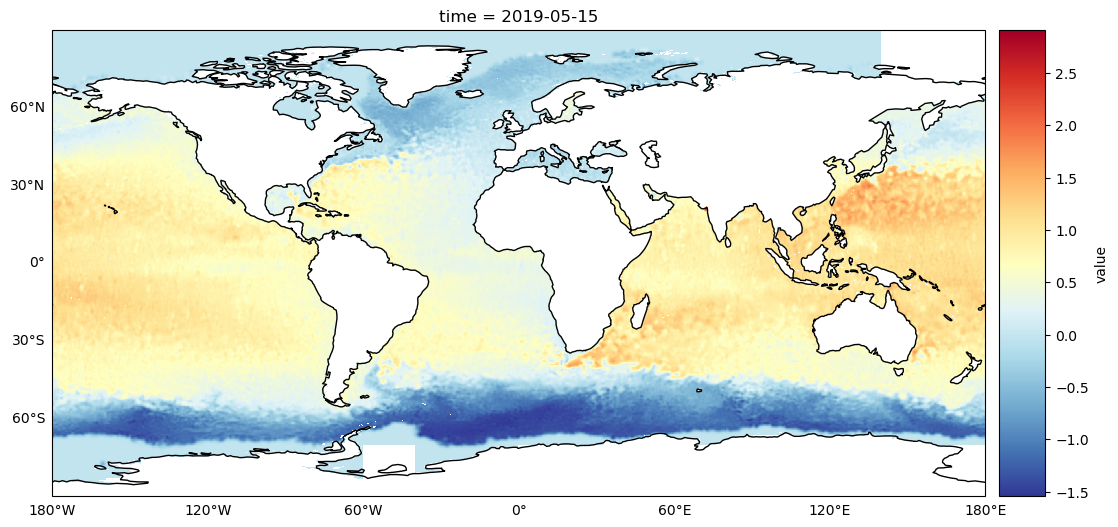

In [11]:
from global_land_mask import globe
lat = outgrid.lat.values
lon = outgrid.lon.values
lon_grid, lat_grid = np.meshgrid(lon,lat)
globe_ocean_mask = globe.is_ocean(lat_grid, lon_grid)
out_plot = (
    outgrid.sel(time='2019-05-15').where(globe_ocean_mask)
    .pipe(lambda ds: ds.where(ds <3))
    .pipe(lambda ds: ds.where(ds >-3))
)
hvfig = out_plot.hvplot(
    kind='quadmesh',
    geo=True,
    coastline=True,
    width=1000,
    cmap='RdYlBu_r'
)
bokfig = hvplot.render(hvfig, backend='matplotlib')
bokfig

/raid/localscratch/qfebvre/ocb/ocb-docs/lib/python3.11/site-packages/pint/facets/plain/quantity.py:998: RuntimeWarning: divide by zero encountered in divide
  magnitude = magnitude_op(new_self._magnitude, other._magnitude)


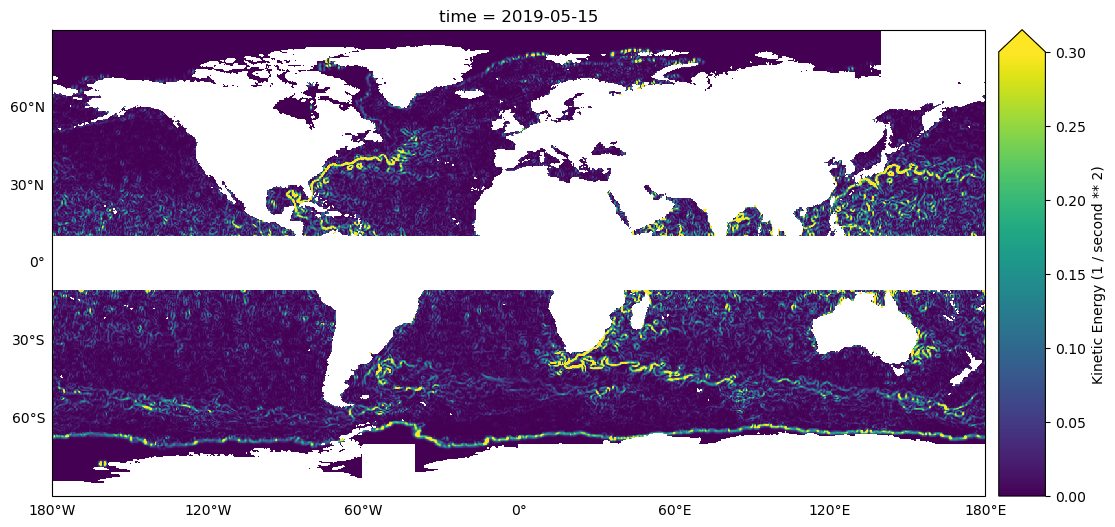

In [12]:
import ocn_tools._src.geoprocessing.geostrophic as geo
import ocn_tools._src.geoprocessing.validation as val
hvfig = (
    out_plot
    .where(np.abs(out_plot.lat)>10)
    .to_dataset(name='ssh')
    .pipe(val.validate_latlon)
    .pipe(geo.geostrophic_velocities)
    .pipe(geo.kinetic_energy)
).ke.hvplot(
    kind='quadmesh',
    geo=True,
    width=1000,
    cmap='viridis',
    clim=(0, 0.3)
)
bokfig = hvplot.render(hvfig, backend='matplotlib')
bokfig

In [13]:
!oost-dc_ose_2021-metrics --cfg job -p params

# @package params
method: default
study_path: data/downloads/method_outputs/${.method}.nc
study_var: ssh
sat: c2
min_time: '2017-01-01'
max_time: '2017-12-31'
min_lon: -65.0
max_lon: -55.0
min_lat: 33.0
max_lat: 43.0


In [14]:
%%writefile conf/aprl/overrides/global_eval.yaml
# @package params

study_path: output.nc
study_var: ssh
sat: alg
min_time: '2019-05-15'
max_time: '2019-05-16'
min_lon: -180
max_lon: 180
min_lat: -90
max_lat: 90

Writing conf/aprl/overrides/global_eval.yaml


In [15]:
%%bash
oost-dc_ose_2021-metrics -m \
    'hydra.searchpath=[file://conf]' \
      +overrides@params=global_eval \
      dry=True

[2024-04-15 15:30:47,528][HYDRA] Launching 1 jobs locally


[2024-04-15 15:30:47,528][HYDRA] 	#0 : +overrides@params=global_eval dry=True


[2024-04-15 15:30:47,642][aprl.appareil][INFO] - Starting


[2024-04-15 15:30:47,642][aprl.appareil][INFO] - Running part _01_dl_track


[2024-04-15 15:30:47,642][aprl.appareil][INFO] - Running part _02_prepare_track


[2024-04-15 15:30:47,642][aprl.appareil][INFO] - Running part _03_interp_on_track


[2024-04-15 15:30:47,642][aprl.appareil][INFO] - Running part _04_1_lambdax


[2024-04-15 15:30:47,642][aprl.appareil][INFO] - Running part _04_2_mu


[2024-04-15 15:30:47,642][aprl.appareil][INFO] - Done


In [16]:
dt, t = pd.to_timedelta("1D"), pd.to_datetime('2019-05-15')
out_grid = outgrid.pipe(val.validate_latlon).pad(time=1, mode='edge').assign_coords(
    time=pd.date_range(t-dt, t+dt, freq=dt)
).to_dataset(name='ssh')
out_grid.to_netcdf('output.nc')

In [17]:
%%bash
oost-dc_ose_2021-metrics \
  'hydra.searchpath=[file://conf]' \
    +overrides@params=global_eval dry=True

[2024-04-15 15:30:50,231][aprl.appareil][INFO] - Starting


[2024-04-15 15:30:50,232][aprl.appareil][INFO] - Running part _01_dl_track


[2024-04-15 15:30:50,232][aprl.appareil][INFO] - Running part _02_prepare_track


[2024-04-15 15:30:50,232][aprl.appareil][INFO] - Running part _03_interp_on_track


[2024-04-15 15:30:50,232][aprl.appareil][INFO] - Running part _04_1_lambdax


[2024-04-15 15:30:50,232][aprl.appareil][INFO] - Running part _04_2_mu


[2024-04-15 15:30:50,232][aprl.appareil][INFO] - Done


In [18]:
%%bash
oost-dc_ose_2021-metrics\
    'hydra.searchpath=[file://conf]' \
     +overrides@params=global_eval

[2024-04-15 15:30:52,851][aprl.appareil][INFO] - Starting


[2024-04-15 15:30:52,851][aprl.appareil][INFO] - Running part _01_dl_track


INFO - 2024-04-15T15:30:53Z - Dataset version was not specified, the latest one was selected: "202112"


[2024-04-15 15:30:53,446][copernicus_marine_root_logger][INFO] - Dataset version was not specified, the latest one was selected: "202112"


INFO - 2024-04-15T15:30:53Z - Dataset part was not specified, the first one was selected: "default"


[2024-04-15 15:30:53,446][copernicus_marine_root_logger][INFO] - Dataset part was not specified, the first one was selected: "default"


INFO - 2024-04-15T15:30:53Z - Service was not specified, the default one was selected: "original-files"


[2024-04-15 15:30:53,446][copernicus_marine_root_logger][INFO] - Service was not specified, the default one was selected: "original-files"


INFO - 2024-04-15T15:30:53Z - Downloading using service original-files...


[2024-04-15 15:30:53,446][copernicus_marine_root_logger][INFO] - Downloading using service original-files...


100%|██████████| 31/31 [00:06<00:00,  4.48it/s]


[2024-04-15 15:31:01,488][aprl.appareil][INFO] - part _01_dl_track done


[2024-04-15 15:31:01,488][aprl.appareil][INFO] - Running part _02_prepare_track


[2024-04-15 15:31:01,488][oost_dc_ose_2021.mods.prepare_track][INFO] - Starting


[2024-04-15 15:31:03,431][oost_dc_ose_2021.mods.prepare_track][INFO] - Done


[2024-04-15 15:31:03,445][aprl.appareil][INFO] - part _02_prepare_track done


[2024-04-15 15:31:03,445][aprl.appareil][INFO] - Running part _03_interp_on_track


[2024-04-15 15:31:03,445][oost_dc_ose_2021.mods.interp_on_track][INFO] - Starting


[2024-04-15 15:31:03,512][oost_dc_ose_2021.mods.interp_on_track][INFO] - Done


[2024-04-15 15:31:03,512][aprl.appareil][INFO] - part _03_interp_on_track done


[2024-04-15 15:31:03,512][aprl.appareil][INFO] - Running part _04_1_lambdax


[2024-04-15 15:31:03,512][oost_dc_ose_2021.mods.lambdax][INFO] - Starting


[2024-04-15 15:31:03,628][oost_dc_ose_2021.mods.lambdax][INFO] - Effective scale resolved (interpolated at score 0.5) 181.46


[2024-04-15 15:31:03,639][oost_dc_ose_2021.mods.lambdax][INFO] - Done


[2024-04-15 15:31:03,639][aprl.appareil][INFO] - part _04_1_lambdax done


[2024-04-15 15:31:03,639][aprl.appareil][INFO] - Running part _04_2_mu


[2024-04-15 15:31:03,639][oost_dc_ose_2021.mods.mu][INFO] - Starting


[2024-04-15 15:31:03,680][oost_dc_ose_2021.mods.mu][INFO] - Mu score: 0.9253623867145405


[2024-04-15 15:31:03,680][oost_dc_ose_2021.mods.mu][INFO] - Done


[2024-04-15 15:31:03,680][aprl.appareil][INFO] - part _04_2_mu done


[2024-04-15 15:31:03,680][aprl.appareil][INFO] - Done


In [19]:
import pandas as pd
import glob
print(pd.concat([pd.read_json(p, typ='series') for p in glob.glob('data/metrics/*.json')]).to_markdown())

|             |          0 |
|:------------|-----------:|
| $\lambda_x$ | 181.456    |
| $\mu$       |   0.925362 |
